In [1]:
import vizseq
from vizseq.ipynb import fairseq_viz as fs
from vizseq.custom import distinct_n as distn
from vizseq.ipynb.core import view_examples, view_stats, view_n_grams, view_scores
from vizseq._view import DEFAULT_PAGE_SIZE, DEFAULT_PAGE_NO, VizSeqSortingType
%matplotlib inline

In [2]:
# see available scores
vizseq.available_scorers()

Available scorers: bert_score, bleu, bp, chrf, cider, gleu, laser, meteor, nist, ribes, rouge_1, rouge_2, rouge_l, ter, wer, wer_del, wer_ins, wer_sub


In [3]:
# set generation output log file
e3 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_3.txt"
e6 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_6.txt"
e9 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_9.txt"
e12 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_12.txt"
e15 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_15.txt"
e18 = "/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/decode_epoch_18.txt"

decoded_outputs = [e3, e6, e9, e12, e15, e18]

# Custom scoring function: Distinct-N

In [8]:
corpus_distinct_1 = {}
corpus_distinct_2 = {}
corpus_distinct_3 = {}

for f in decoded_outputs:
    s, r, h = fs._get_data(f, nbest=1)
    access_key = list(h.keys())[0]
    dist_score_1 = distn.get_corpus_distinct(h[access_key], 1)
    dist_score_2 = distn.get_corpus_distinct(h[access_key], 2)
    dist_score_3 = distn.get_corpus_distinct(h[access_key], 3)

#     access_key = access_key[-1:].replace('_', ' ')
    access_key = access_key.split('_')[-1]
    
    corpus_distinct_1[access_key] = dist_score_1
    corpus_distinct_2[access_key] = dist_score_2
    corpus_distinct_3[access_key] = dist_score_3

In [9]:
print(corpus_distinct_1)
print(corpus_distinct_2)
print(corpus_distinct_3)

{'3': 0.010743721942709103, '6': 0.01234151330585815, '9': 0.019093536997727974, '12': 0.035102499297950014, '15': 0.03453944138518177, '18': 0.061337763985563495}
{'3': 0.022181813168979048, '6': 0.02768306269200905, '9': 0.04430582807156155, '12': 0.07515030060120241, '15': 0.08063513489512104, '18': 0.14228915445896592}
{'3': 0.03012284714972214, '6': 0.03975573851844541, '9': 0.06255403663432474, '12': 0.10632406689555876, '15': 0.11816670370761696, '18': 0.20819957343651269}


INFO - 10/21/20 01:22:04 - 0:02:35 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 10/21/20 01:22:04 - 0:02:35 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 10/21/20 01:22:04 - 0:02:35 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 10/21/20 01:22:04 - 0:02:35 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO - 10/21/20 01:22:04 - 0:02:35 - Using categorical units to plot a list of strings that 

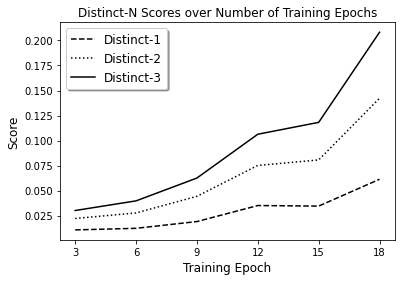

In [10]:
import matplotlib.pyplot as plt

x = corpus_distinct_1.keys()
y1 = corpus_distinct_1.values()
y2 = corpus_distinct_2.values()
y3 = corpus_distinct_3.values()

fig, ax = plt.subplots()
ax.plot(x, y1, 'k--', label='Distinct-1')
ax.plot(x, y2, 'k:', label='Distinct-2')
ax.plot(x, y3, 'k', label='Distinct-3')
# ax.xticks = x

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

plt.xlabel("Training Epoch", fontsize='large')
plt.ylabel("Score", fontsize='large')
plt.title("Distinct-N Scores over Number of Training Epochs", fontsize='large')
plt.savefig('/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100_rg/inference/distinctN_over_epochs.pdf')

,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,823,891","10,829,860"
Reference 0,Text,"21,132","1,439,191","8,519,315"


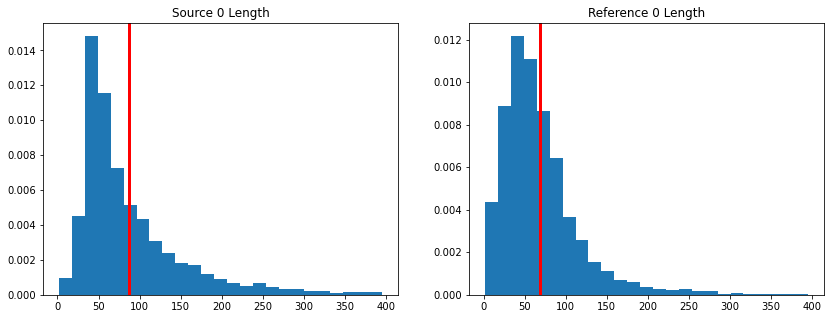

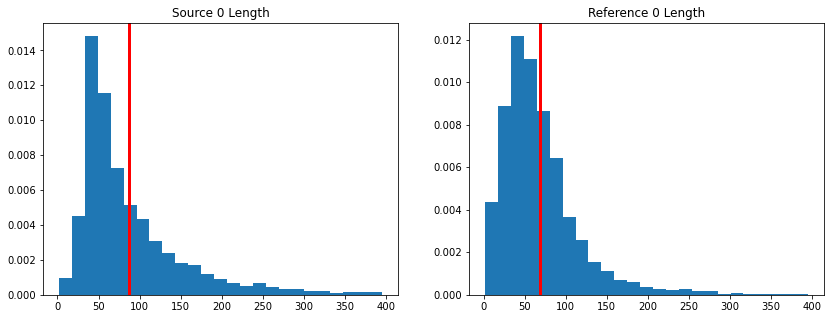

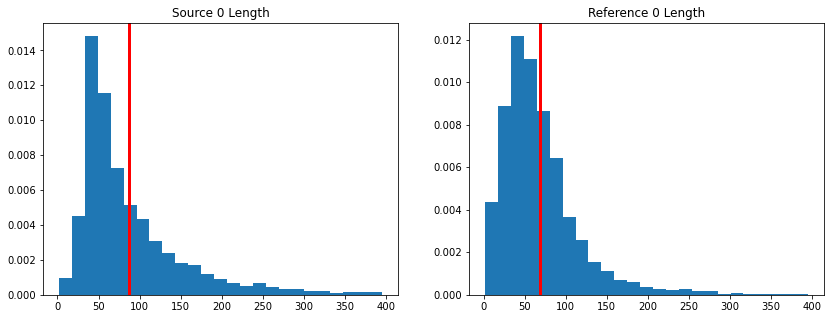

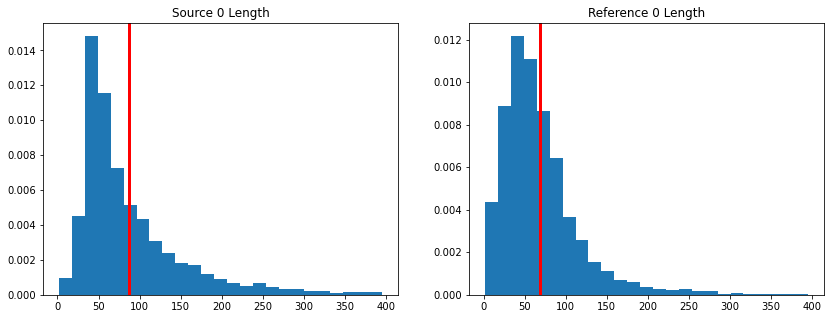

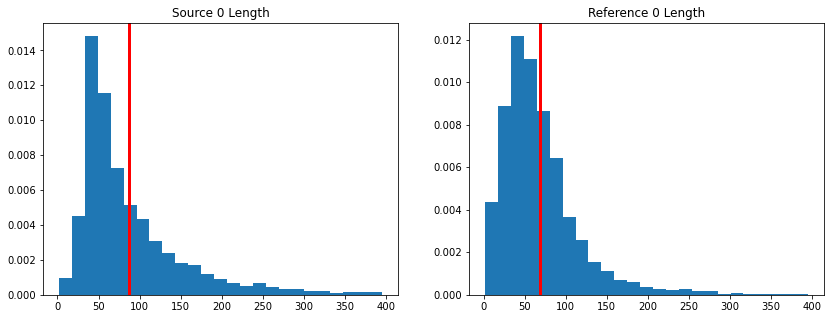

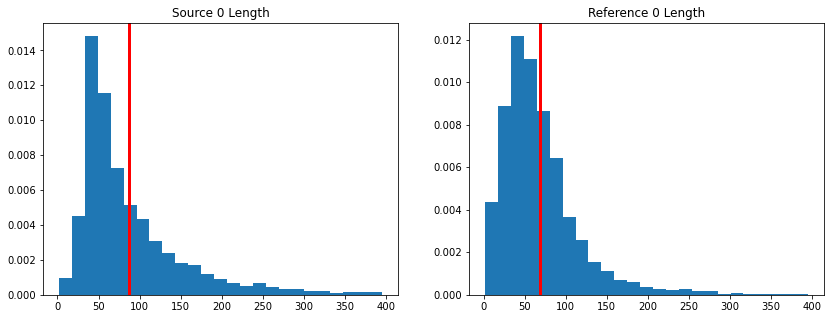

In [17]:
# data set stats
for file in decoded_outputs:
    fs.view_stats(file)

In [19]:
# NOTE: if using bert_score, set `!CUDA_VISIBLE_DEVICES='N'` first to specify the Nth GPU,
# otherwise GPU 0 will be taken
# !CUDA_VISIBLE_DEVICES=1
# fs.view_examples(log_path, metrics=['bleu', 'rouge_1', 'rouge_2', 'rouge_l', 'bert_score'], query='', page_sz=10, page_no=1, need_g_translate=False, disable_alignment=True)

In [11]:
x = fs.view_scores(e3, ['bleu', 'rouge_2'])

In [27]:
from vizseq.scorers.bleu import BLEUScorer

scorer = BLEUScorer(corpus_level=True, sent_level=True, n_workers=2, verbose=False, extra_args=None)

for f in decoded_outputs:
    s, r, h = fs._get_data(f, nbest=1)
    access_key = list(h.keys())[0]
    print(len(h[access_key][:10]), len(r['0']))
#     scores = scorer.score(h[access_key], r['0'])
    
#     print(f)
#     print(f'Corpus-level BLEU: {scores.corpus_score}')
#     print(f'Sentence-level BLEU: {scores.sent_scores}')
#     print(f'Group BLEU: {scores.group_scores}')


21132 21132
21132 21132
21132 21132
21132 21132
21132 21132
21132 21132


In [16]:
print(type(x))
print(x.__dict__)

<class 'IPython.core.display.HTML'>
{'url': None, 'filename': None, 'data': '<!DOCTYPE html>\n<html lang="en">\n<head>\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css"\n          integrity="sha384-GJzZqFGwb1QTTN6wy59ffF1BuGJpLSa9DkKMp0DgiMDm4iYMj70gZWKYbI706tWS" crossorigin="anonymous">\n\n    <style>\n        body {\n            padding-top: 60px; /* 60px to make the container go all the way to the bottom of the topbar */\n        }\n    </style>\n</head>\n\n<body>\n\n\n\n\n<script>\n    function visualizeDict(dict) {\n        let values = Object.keys(dict).map(k => dict[k]);\n        let worse_v = Math.min(...values);\n        let best_v = Math.max(...values);\n        let visualized = {};\n        Object.keys(dict).forEach(function (k) {\n            if (dict[k] === worse_v) {\n                visualized[k] = \'<span style="font-style:italic"><u>\' + dict[k] + \'</u></span>\';\n            } else if (dict[k] === best_v) {\n 

In [18]:
# !CUDA_VISIBLE_DEVICES=1
for file in decoded_outputs:
    # fs.view_scores(file, ['bleu', 'rouge_1', 'rouge_2', 'rouge_l', 'bert_score'])
    fs.view_scores(file, ['bleu', 'rouge_2'])

In [11]:
# source-side n-grams

# vizseq.view_n_grams(src, k=10)

fs.view_n_grams(log_path)

1-gram,Count
.,108318
",",74195
und,55775
das,36328
die,35259
der,29803
sehr,29344
ist,23774
---sep---,20434
in,20379


# 'Custom' visualisations


,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,439,191","8,519,315"
Reference nbest5,Text,"21,132","818,994","4,410,003"


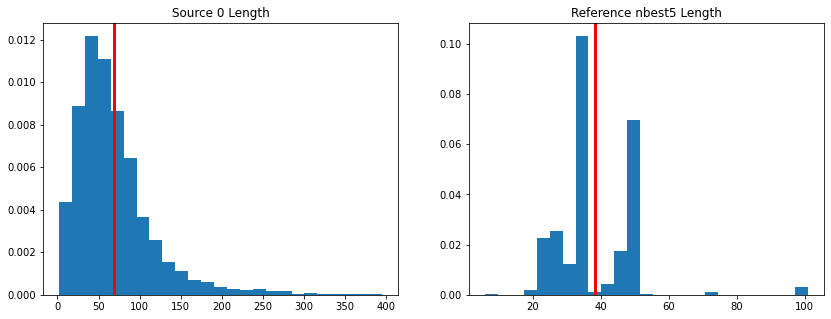

In [17]:
# compare reference lengths with hypothesis lengths
view_stats(r, h)